<a href="https://colab.research.google.com/github/daniellelobas/Curriculo/blob/main/C%C3%B3pia_de_graficos1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas openpyxl

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('resumo_semanal_lpc_2024-05-19_2024-05-25.xlsx', engine='openpyxl', header=9)
print(df.columns)

Index(['DATA INICIAL', 'DATA FINAL', 'ESTADO', 'MUNICÍPIO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'COEF DE VARIAÇÃO REVENDA'],
      dtype='object')


In [ ]:
df.describe()

,DATA INICIAL,DATA FINAL,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA
count,165,165,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,2024-05-19 00:00:00,2024-05-25 00:00:00,23.878788,21.169394,1.264542,19.093879,24.141939,0.035145
min,2024-05-19 00:00:00,2024-05-25 00:00:00,1.000000,3.510000,0.000000,3.090000,3.590000,0.000000
25%,2024-05-19 00:00:00,2024-05-25 00:00:00,10.000000,5.510000,0.073111,4.990000,5.590000,0.014000
50%,2024-05-19 00:00:00,2024-05-25 00:00:00,18.000000,5.880000,0.159317,5.640000,6.240000,0.028000
75%,2024-05-19 00:00:00,2024-05-25 00:00:00,31.000000,6.320000,0.282843,6.190000,6.890000,0.048000
max,2024-05-19 00:00:00,2024-05-25 00:00:00,188.000000,127.480000,13.779289,118.000000,140.000000,0.129000
std,NaN,NaN,27.231122,36.479436,2.876643,32.300570,42.513625,0.030185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATA INICIAL                  165 non-null    datetime64[ns]
 1   DATA FINAL                    165 non-null    datetime64[ns]
 2   ESTADO                        165 non-null    object        
 3   MUNICÍPIO                     165 non-null    object        
 4   PRODUTO                       165 non-null    object        
 5   NÚMERO DE POSTOS PESQUISADOS  165 non-null    int64         
 6   UNIDADE DE MEDIDA             165 non-null    object        
 7   PREÇO MÉDIO REVENDA           165 non-null    float64       
 8   DESVIO PADRÃO REVENDA         165 non-null    float64       
 9   PREÇO MÍNIMO REVENDA          165 non-null    float64       
 10  PREÇO MÁXIMO REVENDA          165 non-null    float64       
 11  COEF DE VARIAÇÃO REVENDA      16

In [ ]:
df = df[df['DATA INICIAL'].notna()]
print(df)

    DATA INICIAL DATA FINAL            ESTADO       MUNICÍPIO  \
0     2024-05-19 2024-05-25           SERGIPE         ARACAJU   
1     2024-05-19 2024-05-25              PARA           BELEM   
2     2024-05-19 2024-05-25      MINAS GERAIS  BELO HORIZONTE   
3     2024-05-19 2024-05-25           RORAIMA       BOA VISTA   
4     2024-05-19 2024-05-25  DISTRITO FEDERAL        BRASILIA   
..           ...        ...               ...             ...   
160   2024-05-19 2024-05-25             BAHIA        SALVADOR   
161   2024-05-19 2024-05-25          MARANHAO        SAO LUIS   
162   2024-05-19 2024-05-25         SAO PAULO       SAO PAULO   
163   2024-05-19 2024-05-25             PIAUI        TERESINA   
164   2024-05-19 2024-05-25    ESPIRITO SANTO         VITORIA   

              PRODUTO  NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  \
0    ETANOL HIDRATADO                            17              R$/l   
1    ETANOL HIDRATADO                            10              R$/l   


# Identificando os municipios com media de preço alto e baixo

# --- Primeiro Gráfico: Estado vs. Quantidade de Postos Pesquisados ---

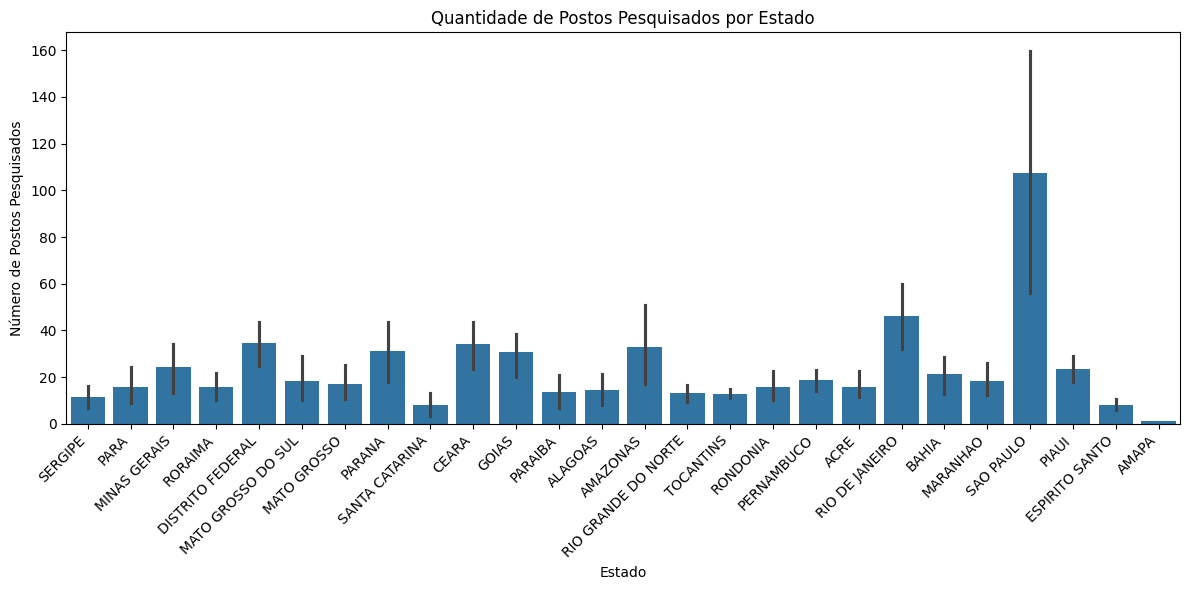

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ESTADO', y='NÚMERO DE POSTOS PESQUISADOS', data=df)
plt.title('Quantidade de Postos Pesquisados por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Postos Pesquisados')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 --- Segundo Gráfico: Número de Postos Pesquisados vs. Média de Preço da Revenda ---

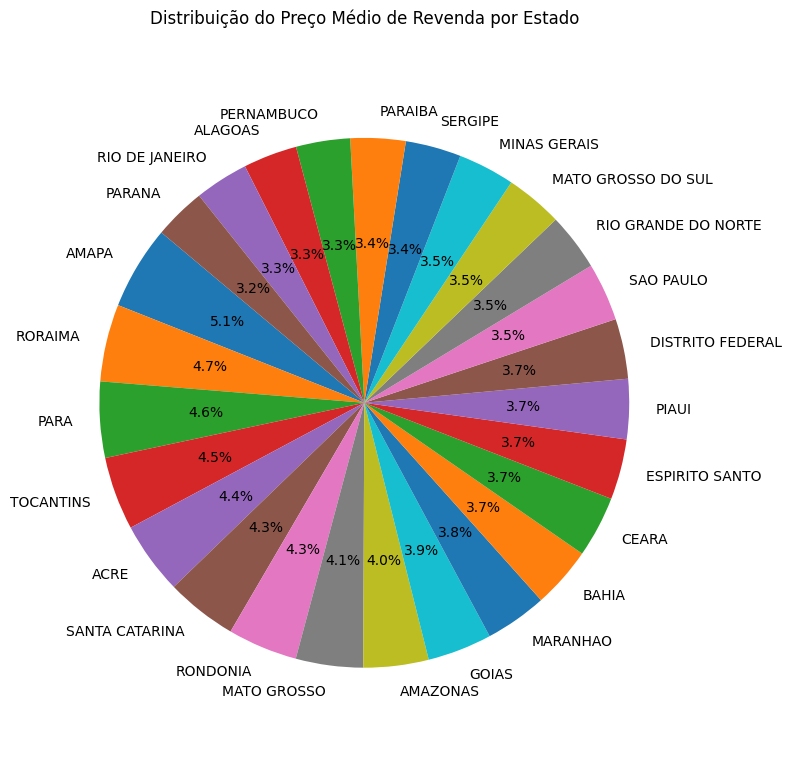

In [ ]:
preco_medio_por_estado = df.groupby('ESTADO')['PREÇO MÉDIO REVENDA'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(preco_medio_por_estado, labels=preco_medio_por_estado.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição do Preço Médio de Revenda por Estado')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [ ]:
preco_medio_municipio = df.groupby('MUNICÍPIO')['PREÇO MÉDIO REVENDA'].mean().sort_values(ascending=False)
preco_medio_df = preco_medio_municipio.reset_index()
preco_medio_df.columns = ['MUNICÍPIO', 'PREÇO_MÉDIO_REVENDA']
preco_medio_df.head()

,MUNICÍPIO,PREÇO_MÉDIO_REVENDA
0,MACAPA,28.364000
1,BOA VISTA,26.221667
2,BELEM,25.760000
3,PALMAS,24.835000
4,RIO BRANCO,24.545000


In [ ]:
media_preco_alto = preco_medio_df.iloc[0]
media_preco_baixo = preco_medio_df.iloc[-1]

In [ ]:
print(preco_medio_df.columns)

Index(['MUNICÍPIO', 'PREÇO_MÉDIO_REVENDA'], dtype='object')


<ipython-input-13-c0864c148441>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PREÇO_MÉDIO_REVENDA', y='MUNICÍPIO', data=preco_medio_df, palette='viridis')


Text(0, 0.5, 'MUNICÍPIO')

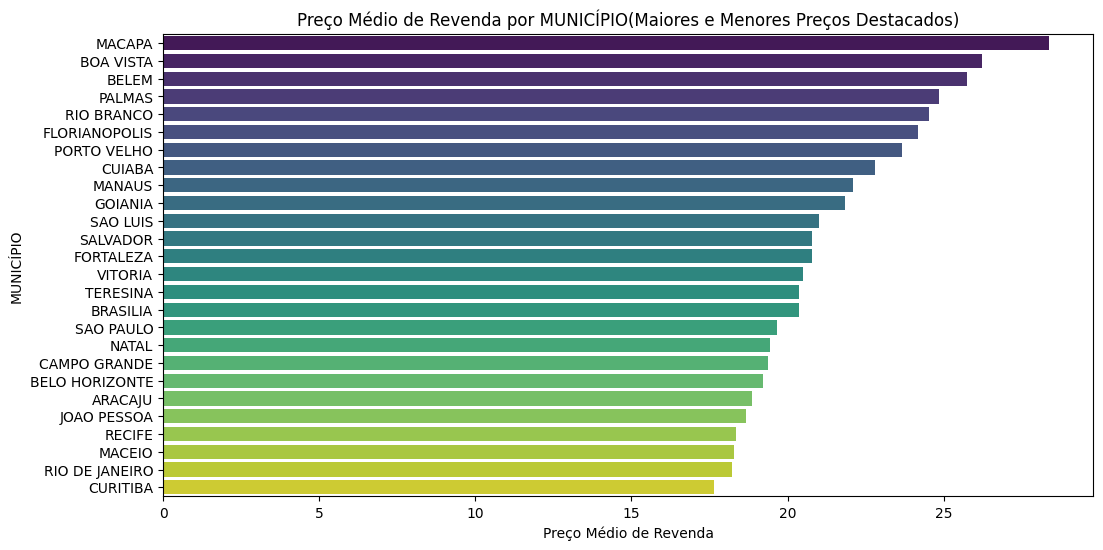

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='PREÇO_MÉDIO_REVENDA', y='MUNICÍPIO', data=preco_medio_df, palette='viridis')
plt.title('Preço Médio de Revenda por MUNICÍPIO(Maiores e Menores Preços Destacados)')
plt.xlabel('Preço Médio de Revenda')
plt.ylabel('MUNICÍPIO')